<a href="https://colab.research.google.com/github/Alamsyah-WM/Predict-DNA-binding-protein-with-ML-and-DL/blob/main/BioInformatik_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [3]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from sklearn.model_selection import train_test_split  # For splitting datasets
from sklearn.preprocessing import StandardScaler  # For scaling features

##Load Dataset

In [5]:
pdb = pd.read_csv('/content/PDB1063-186.csv')
uniswiss = pd.read_csv('/content/UniSwiss.csv')

print("Raw PDB Dataset:")
print(pdb.head())

print("\nRaw UniSwiss Dataset:")
print(uniswiss.head())

print("\nPDB Info:")
print(pdb.info())

print("\nUniSwiss Info:")
print(uniswiss.info())

Raw PDB Dataset:
  identifier                                           sequence  label    set
0      1AKHB  TKPYRGHRFTKENVRILESWFAKNIENPYLDTKGLENLMKNTSLSR...      1  train
1      1B6WA  MELPIAPIGRIIKDAGAERVSDDARITLAKILEEMGRDIASEAIKL...      1  train
2      1C1KA  MIKLRMPAGGERYIDGKSVYKLYLMIKQHMNGKYDVIKYNWCMRVS...      1  train
3      1C6VX  QQSKNSKFKNFRVYYREGRDQLWKGPGELLWKGEGAVLLKVGTDIK...      1  train
4      1C6VD  IHGQVNSDLGTWQMDCTHLEGKIVIVAVHVASGFIEAEVIPQETGR...      1  train

Raw UniSwiss Dataset:
   identifier                                           sequence  label    set
0      P08956  MMNKSNFEFLKGVNDFTYAIACAAENNYPDDPNTTLIKMRMFGEAT...      1  train
1      P27235  MPPQRSRRRKRASATQLYQTCKASGTCPPDVIPKVEGTTLADKILQ...      1  train
2      P0AD01  MINVLIIDDDAMVAELNRRYVAQIPGFQCCGTASTLEKAKEIIFNS...      1  train
3  A0A024B7I0  MAYMCADSGNLMAIAQQVIKQKQQQEQQQQQSHHPQQQFLGLNPFS...      1  train
4      F4I443  MAEFTNMLMNPWVLHLQKLELELKCPLCLKLLNRPVLLPCDHVFCD...      1  train

PDB Info:
<class 

##Understanding Dataset

In [7]:
# Count sequence length for each protein seqeuence
pdb['seq_len'] = pdb['sequence'].str.len()
uniswiss['seq_len'] = uniswiss['sequence'].str.len()

# Count the label distribution balances
pdb_label_counts = pdb['label'].value_counts()
uniswiss_label_counts = uniswiss['label'].value_counts()

# Count total set distribution for split
pdb_set_counts = pdb['set'].value_counts()
pdb_set_percentage = (pdb_set_counts / len(pdb)) * 100 #Calculate into percentage
uniswiss_set_counts = uniswiss['set'].value_counts()
uniswiss_set_percentage = (uniswiss_set_counts / len(uniswiss)) * 100 #Calculate into percentage

# Get information about the datasets
print("Total PDB Sequence:", len(pdb))
print("Total Uniswiss Sequence:", len(uniswiss))

print("\nAverage PDB Sequence Length:", int(pdb['seq_len'].mean()))
print("Average Uniswiss Sequence Length:", int(uniswiss['seq_len'].mean()))

print("\nMinimum PDB Sequence Length:", pdb['seq_len'].min())
print("Maximum PDB Sequence Length:", pdb['seq_len'].max())

print("\nMinimum Uniswiss Sequence Length:", uniswiss['seq_len'].min())
print("Maximum Uniswiss Sequence Length:", uniswiss['seq_len'].max())


print("\nMissing Values in PDB Dataset:")
print(pdb.isnull().sum())
print("\nMissing Values in UniSwiss Dataset:")
print(uniswiss.isnull().sum())

print("\nLabel Distribution in PDB Dataset:")
print(pdb_label_counts)
print("\nLabel Distribution in UniSwiss Dataset:")
print(uniswiss_label_counts)

print("\nRaw PDB Dataset split:")
print(pdb_set_counts)
print(pdb_set_percentage)

print("\nRaw UniSwiss Dataset Split:")
print(uniswiss_set_counts)
print(uniswiss_set_percentage)

Total PDB Sequence: 1249
Total Uniswiss Sequence: 9762

Average PDB Sequence Length: 243
Average Uniswiss Sequence Length: 475

Minimum PDB Sequence Length: 50
Maximum PDB Sequence Length: 1323

Minimum Uniswiss Sequence Length: 50
Maximum Uniswiss Sequence Length: 8515

Missing Values in PDB Dataset:
identifier    0
sequence      0
label         0
set           0
seq_len       0
dtype: int64

Missing Values in UniSwiss Dataset:
identifier    0
sequence      0
label         0
set           0
seq_len       0
dtype: int64

Label Distribution in PDB Dataset:
label
0    638
1    611
Name: count, dtype: int64

Label Distribution in UniSwiss Dataset:
label
1    4881
0    4881
Name: count, dtype: int64

Raw PDB Dataset split:
set
train    1063
test      186
Name: count, dtype: int64
set
train    85.108086
test     14.891914
Name: count, dtype: float64

Raw UniSwiss Dataset Split:
set
train    9000
test      762
Name: count, dtype: int64
set
train    92.194222
test      7.805778
Name: count, d

#**Exploraty Data Analysis**
##Objective
1. Analyse sequence length distribution
2. Amino Acid Composition Binding vs Non-Binding
3. To be continue...


###1. Sequence lenght Distribution

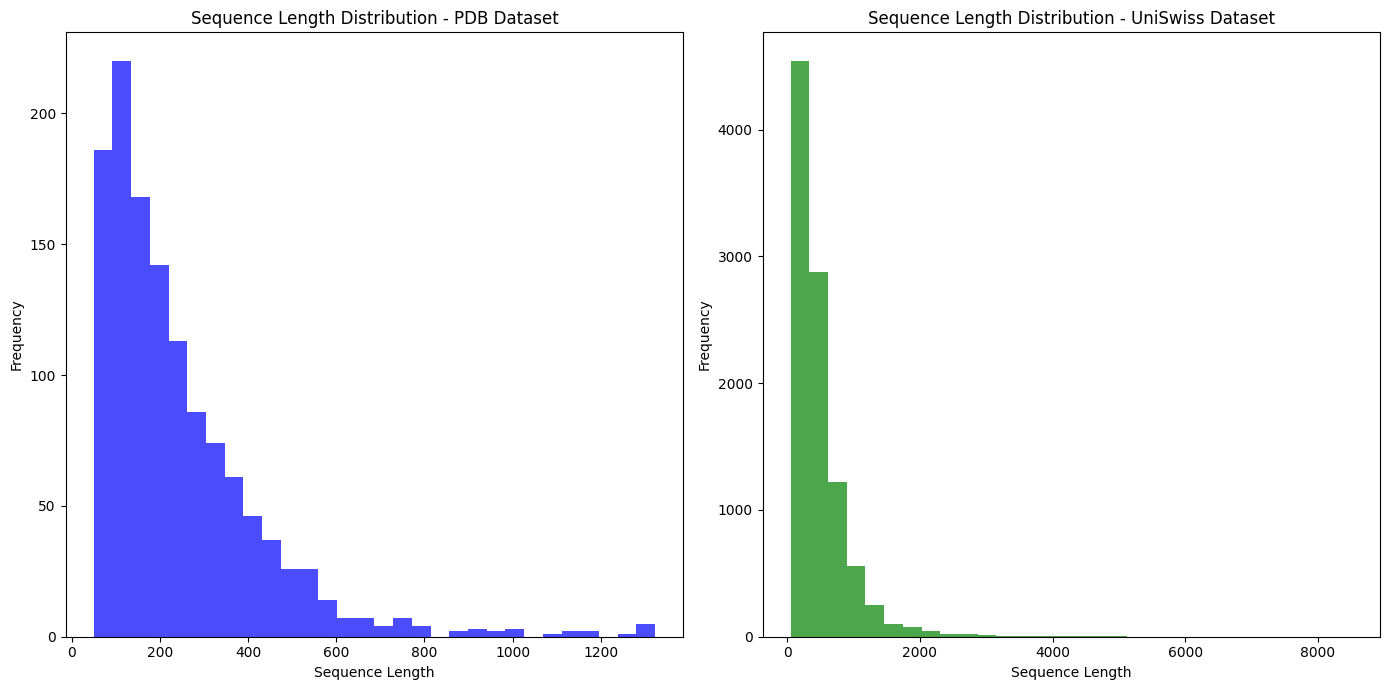

In [9]:
# Plot sequence length distribution for both datasets
plt.figure(figsize=(14, 7))

# PDB Sequence Length Distribution
plt.subplot(1, 2, 1)
plt.hist(pdb['seq_len'], bins=30, alpha=0.7, color='blue')
plt.title('Sequence Length Distribution - PDB Dataset')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# UniSwiss Sequence Length Distribution
plt.subplot(1, 2, 2)
plt.hist(uniswiss['seq_len'], bins=30, alpha=0.7, color='green')
plt.title('Sequence Length Distribution - UniSwiss Dataset')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###2. Composition Based

In [10]:
# Function with AAC Method
def amino_acid_composition(sequence):
    aa_count = {aa: sequence.count(aa) for aa in 'ACDEFGHIKLMNPQRSTVWY'}
    total = len(sequence)
    aa_percent = {aa: count / total * 100 for aa, count in aa_count.items()}
    return aa_percent

# Define PDB Binding and Non-Binding Proteins
binding_pdb = pdb[pdb['label'] == 1]
non_binding_pdb = pdb[pdb['label'] == 0]

# Define Unisweet Binding and Non-Binding Proteins
binding_uniswiss = uniswiss[uniswiss['label'] == 1]
non_binding_uniswiss = uniswiss[uniswiss['label'] == 0]

# Compare AAC between DNA-binding and non-binding proteins PDB
binding_pdb_aac = binding_pdb['sequence'].apply(amino_acid_composition)
non_binding_pdb_aac = non_binding_pdb['sequence'].apply(amino_acid_composition)

# Compare AAC between DNA-binding and non-binding proteins UniSwiss
binding_uniswiss_aac = binding_uniswiss['sequence'].apply(amino_acid_composition)
non_binding_uniswiss_aac = non_binding_uniswiss['sequence'].apply(amino_acid_composition)

# List PDB in DataFrame view
binding_pdb_acc_df = pd.DataFrame(list(binding_pdb_aac))
non_binding_pdb_acc_df = pd.DataFrame(list(non_binding_pdb_aac))

# Display the PDB Binding and Non-Binding protein Composition
print("Dont know")
print(binding_pdb_acc_df)
print("\nDont know")
print(non_binding_pdb_acc_df)


Dont know
             A         C         D          E         F          G         H  \
0     4.819277  0.000000  2.409639   9.638554  2.409639   3.614458  1.204819   
1    15.942029  0.000000  7.246377  10.144928  1.449275   5.797101  1.449275   
2     5.069124  0.921659  6.451613   5.529954  6.451613   2.764977  0.921659   
3     4.938272  0.000000  6.172840   8.641975  2.469136  12.345679  1.234568   
4     7.926829  1.219512  3.048780   7.317073  3.048780   7.926829  6.097561   
..         ...       ...       ...        ...       ...        ...       ...   
606   7.200000  0.000000  7.600000   6.800000  3.600000   8.800000  1.600000   
607   7.299270  0.729927  5.109489   8.759124  4.379562  10.218978  2.919708   
608   7.947020  0.331126  5.960265   8.609272  3.642384   4.304636  3.311258   
609   6.060606  0.000000  7.575758   6.060606  1.515152   9.090909  1.515152   
610   7.438017  0.826446  2.892562   7.438017  6.198347   8.264463  2.066116   

             I          K    